In [1]:
from Functions_100ind import *
import numpy as np 
import matplotlib.pyplot as plt 
import os

%load_ext autoreload
%autoreload 2

In [2]:
path = os.getcwd()
path_data = path+'/GIMME analyses/Cleaned GIMME Data/Control_Group/10'
numbers = []
[numbers.append(str(num)) for num in range(1,101)]
numbers

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100']

In [ ]:
# for time_points in [50, 75, 150]:
#     for alpha in [0, 0.01, 0.1, 0.5]:
#         for rep in range(1, 11):
#             os.makedirs(path+'/100_ind/AR1/AR1_'+str(alpha)+'/days_'+str(time_points)+'/rep_'+str(rep), exist_ok=True)
#             os.makedirs(path+'/100_ind/AR1/AR1_'+str(alpha)+'/days_'+str(time_points)+'/covariance', exist_ok=True)

# Diagonal

In [ ]:
cov_type = 'diagonal'

for alpha in [1, 0.01, 0.1, 0.5]:
    for days in [75, 50, 150]:
        for rep in range(1,11):  
            for num in numbers:
                A, B = get_betas(num) 
                covariance = get_cov(num, alpha, cov_type)
                M = get_matrix(num, (days,6), covariance)

                np.savetxt(path+'/100_ind/Diagonal/Diagonal_'+str(alpha)+'/days_'+str(days)+'/rep_'+str(rep)+'/ind_'+str(int(num))+'.txt', 
                           M, delimiter=',', header='VR1,VR2,VR3,VR4,VR5,VR6', comments='') #simulated data 

                np.savetxt(path+'/100_ind/Diagonal/Diagonal_'+str(alpha)+'/days_'+str(days)+'/covariance/cov_'+str(int(num))+'.txt', 
                           covariance, delimiter=',', header='VR1,VR2,VR3,VR4,VR5,VR6', comments='') #covariance structure 

In [20]:
# print covariance. covariance is same across individuals because every individual has same mean & std for 
# a given variable. 
def covariance(cov_type: str, alpha: str): 
    """Return the covariance structure. cov_type can be 'Diagonal', 'AR1' or 'Compound'."""
    cov = np.loadtxt(path+'/100_ind/'+cov_type+'/'+cov_type+'_'+alpha+'/days_50/covariance/cov_1.txt', skiprows=1, delimiter=',')
    return cov 
covariance('Diagonal', '1')

array([[1.4161, 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 1.7161, 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 1.9044, 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 1.4161, 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 1.44  , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.3689]])

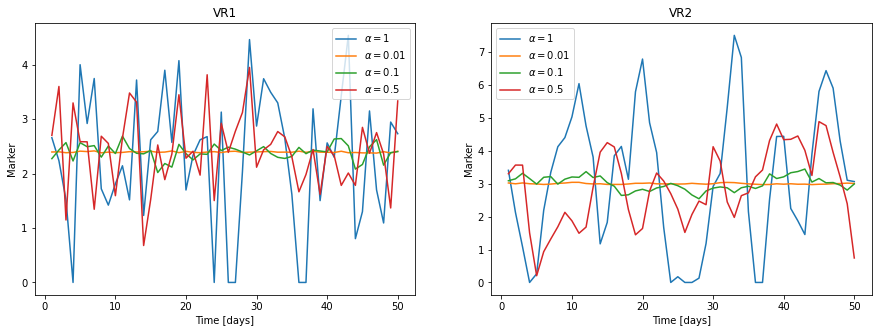

In [14]:
# test plots 
VR1_1,VR2_1,VR3_1,VR4_1,VR5_1,VR6_1 = np.loadtxt(path+'/100_ind/Diagonal/Diagonal_1/days_50/rep_1/ind_1.txt', skiprows=1, delimiter=',', unpack=True)
VR1_0p01,VR2_0p01,VR3_0p01,VR4_0p01,VR5_0p01,VR6_0p01 = np.loadtxt(path+'/100_ind/Diagonal/Diagonal_0.01/days_50/rep_1/ind_1.txt', skiprows=1, delimiter=',', unpack=True)
VR1_0p1,VR2_0p1,VR3_0p1,VR4_0p1,VR5_0p1,VR6_0p1 = np.loadtxt(path+'/100_ind/Diagonal/Diagonal_0.1/days_50/rep_1/ind_1.txt', skiprows=1, delimiter=',', unpack=True)
VR1_0p5,VR2_0p5,VR3_0p5,VR4_0p5,VR5_0p5,VR6_0p5 = np.loadtxt(path+'/100_ind/Diagonal/Diagonal_0.5/days_50/rep_1/ind_1.txt', skiprows=1, delimiter=',', unpack=True)
t = np.arange(1,51)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(t, VR1_1, label=r'$\alpha=1$')
plt.plot(t, VR1_0p01, label=r'$\alpha=0.01$')
plt.plot(t, VR1_0p1, label=r'$\alpha=0.1$')
plt.plot(t, VR1_0p5, label=r'$\alpha=0.5$')
plt.title('VR1')
plt.xlabel('Time [days]')
plt.ylabel('Marker')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, VR2_1, label=r'$\alpha=1$')
plt.plot(t, VR2_0p01, label=r'$\alpha=0.01$')
plt.plot(t, VR2_0p1, label=r'$\alpha=0.1$')
plt.plot(t, VR2_0p5, label=r'$\alpha=0.5$')
plt.title('VR2')
plt.xlabel('Time [days]')
plt.ylabel('Marker')
plt.legend()

# AR1

In [10]:
cov_type = 'AR1'

for alpha in [0, 0.01, 0.1, 0.5]:
    for days in [75, 50, 150]:
        for rep in range(1,11):  
            for num in numbers:
                A, B = get_betas(num) 
                covariance = get_cov(num, alpha, cov_type)
                M = get_matrix(num, (days,6), covariance)

                np.savetxt(path+'/100_ind/AR1/AR1_'+str(alpha)+'/days_'+str(days)+'/rep_'+str(rep)+'/ind_'+str(int(num))+'.txt', 
                           M, delimiter=',', header='VR1,VR2,VR3,VR4,VR5,VR6', comments='') #simulated data 

                np.savetxt(path+'/100_ind/AR1/AR1_'+str(alpha)+'/days_'+str(days)+'/covariance/cov_'+str(int(num))+'.txt', 
                           covariance, delimiter=',', header='VR1,VR2,VR3,VR4,VR5,VR6', comments='') #covariance structure 

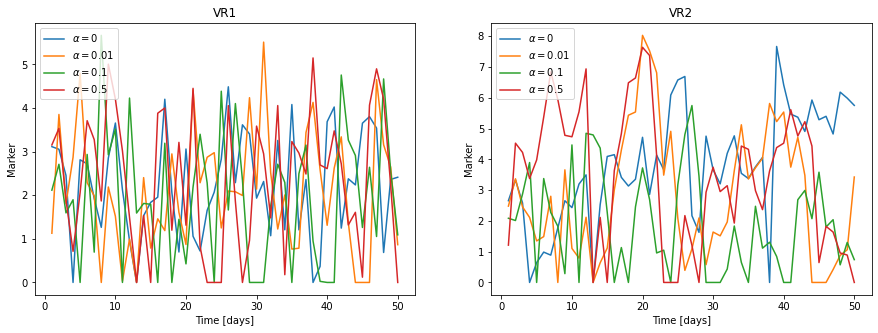

In [13]:
# test plots 
VR1_0,VR2_0,VR3_0,VR4_0,VR5_0,VR6_0 = np.loadtxt(path+'/100_ind/AR1/AR1_0/days_50/rep_1/ind_1.txt', skiprows=1, delimiter=',', unpack=True)
VR1_0p01,VR2_0p01,VR3_0p01,VR4_0p01,VR5_0p01,VR6_0p01 = np.loadtxt(path+'/100_ind/AR1/AR1_0.01/days_50/rep_1/ind_1.txt', skiprows=1, delimiter=',', unpack=True)
VR1_0p1,VR2_0p1,VR3_0p1,VR4_0p1,VR5_0p1,VR6_0p1 = np.loadtxt(path+'/100_ind/AR1/AR1_0.1/days_50/rep_1/ind_1.txt', skiprows=1, delimiter=',', unpack=True)
VR1_0p5,VR2_0p5,VR3_0p5,VR4_0p5,VR5_0p5,VR6_0p5 = np.loadtxt(path+'/100_ind/AR1/AR1_0.5/days_50/rep_1/ind_1.txt', skiprows=1, delimiter=',', unpack=True)
t = np.arange(1,51)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(t, VR1_0, label=r'$\alpha=0$')
plt.plot(t, VR1_0p01, label=r'$\alpha=0.01$')
plt.plot(t, VR1_0p1, label=r'$\alpha=0.1$')
plt.plot(t, VR1_0p5, label=r'$\alpha=0.5$')
plt.title('VR1')
plt.xlabel('Time [days]')
plt.ylabel('Marker')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, VR2_0, label=r'$\alpha=0$')
plt.plot(t, VR2_0p01, label=r'$\alpha=0.01$')
plt.plot(t, VR2_0p1, label=r'$\alpha=0.1$')
plt.plot(t, VR2_0p5, label=r'$\alpha=0.5$')
plt.title('VR2')
plt.xlabel('Time [days]')
plt.ylabel('Marker')
plt.legend()

# Compound

In [15]:
cov_type = 'compound'

for alpha in [0, 0.01, 0.1, 0.5]:
    for days in [75, 50, 150]:
        for rep in range(1,11):  
            for num in numbers:
                A, B = get_betas(num) 
                covariance = get_cov(num, alpha, cov_type)
                M = get_matrix(num, (days,6), covariance)

                np.savetxt(path+'/100_ind/Compound/Compound_'+str(alpha)+'/days_'+str(days)+'/rep_'+str(rep)+'/ind_'+str(int(num))+'.txt', 
                           M, delimiter=',', header='VR1,VR2,VR3,VR4,VR5,VR6', comments='') #simulated data 

                np.savetxt(path+'/100_ind/Compound/Compound_'+str(alpha)+'/days_'+str(days)+'/covariance/cov_'+str(int(num))+'.txt', 
                           covariance, delimiter=',', header='VR1,VR2,VR3,VR4,VR5,VR6', comments='') #covariance structure 

In [24]:
a = covariance('Diagonal', '1')
b = covariance('AR1', '0')
c = covariance('Compound', '0')
np.logical_and( (a==b).all(), (b==c).all() )

True